In [298]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

data = pd.read_csv("/content/Iris (1).csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [299]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [301]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = data['Species'].values

In [302]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [303]:
X.shape

(150, 4)

In [313]:
initial_centroids_idx = np.random.choice(X.shape[0], K, replace=False)
initial_centroids_idx

array([ 54,  71, 117])

In [314]:
X[initial_centroids_idx]

array([[6.5, 2.8, 4.6, 1.5],
       [6.1, 2.8, 4. , 1.3],
       [7.7, 3.8, 6.7, 2.2]])

In [322]:

K = 3
# Step 1: Initialize centroids (randomly pick K points from the dataset)

initial_centroids_idx = np.random.choice(X.shape[0], K, replace=False)
centroids = X[initial_centroids_idx]


In [323]:
centroids

array([[6.5, 2.8, 4.6, 1.5],
       [6.1, 2.8, 4. , 1.3],
       [7.7, 3.8, 6.7, 2.2]])

In [324]:
# Function to compute Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [325]:
# Function to assign points to the nearest centroid
def assign_clusters(X, centroids):
    clusters = {}
    for idx, point in enumerate(X):
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        if closest_centroid not in clusters:
            clusters[closest_centroid] = []
        clusters[closest_centroid].append(idx)
    return clusters

# Function to update centroids by computing the mean of points in each cluster
def update_centroids(X, clusters, K):
    new_centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        new_centroids[i] = np.mean(X[clusters[i]], axis=0)
    return new_centroids

In [346]:
# K-Means Algorithm
def kmeans(X, K, max_iters=300, tol=1e-10):
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]  # Random initial centroids
    for i in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, K)

        # Check for convergence (if centroids do not change)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids
    return centroids, clusters

# Run K-means algorithm
centroids, clusters = kmeans(X, K)

In [347]:
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [348]:
# Assign predicted labels based on the cluster number
predictions = np.zeros(len(X))
for cluster_id, indices in clusters.items():
    predictions[indices] = cluster_id

# Map cluster numbers to actual species (since we know the classes)
species_map = {}
for i in range(K):
    species_count = pd.Series(y[clusters[i]]).value_counts()
    species_map[i] = species_count.idxmax()  # The most common species in this cluster

# Print the mapping of clusters to species
print("Cluster to Species Mapping:")
for cluster_id, species in species_map.items():
    print(f"Cluster {cluster_id}: {species}")


Cluster to Species Mapping:
Cluster 0: Iris-versicolor
Cluster 1: Iris-setosa
Cluster 2: Iris-virginica


In [349]:
###### Assign the predicted species to each sample based on its cluster assignment
predicted_species = [species_map[cluster_id] for cluster_id in predictions]

# Show a few predictions (first 10)
print("\nPredicted Species (first 10 rows):")
print(predicted_species[:10])

# Optional: You can calculate accuracy if you have the true labels
accuracy = np.mean(predicted_species == y) * 100
print(f"\nAccuracy: {accuracy:.2f}%")


Predicted Species (first 10 rows):
['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa']

Accuracy: 89.33%


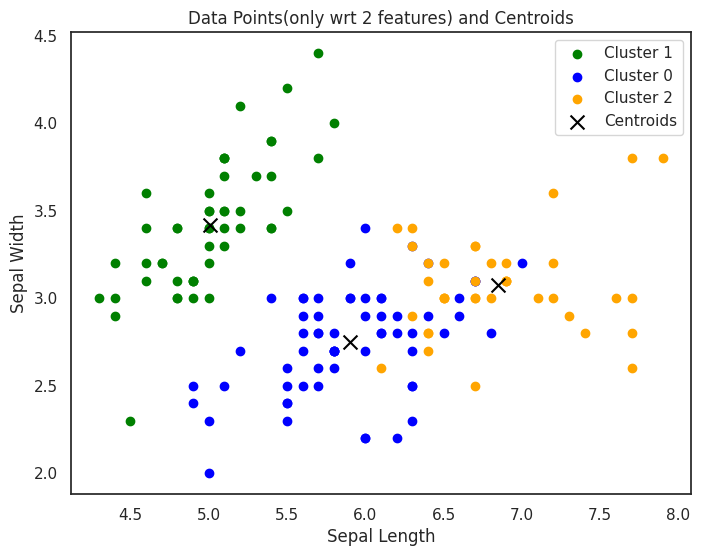

In [350]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 6))
colors = [ 'blue', 'green', 'orange']
for cluster_id, indices in clusters.items():
    plt.scatter(X[indices, 0], X[indices, 1], color=colors[cluster_id], label=f"Cluster {cluster_id}")

centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
plt.title('Data Points(only wrt 2 features) and Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()